Churn machine learning development


In [ ]:
#Exploratory Data Analysis (EDA)

In [ ]:
#importing important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load dataset
from google.colab import files

uploaded = files.upload()


Saving Customer_Churn.csv to Customer_Churn (1).csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Customer_Churn (1).csv']))

In [ ]:
#explore dataset
# Display the first few rows of the dataframe
print(df.head())

# Display information about the dataframe
print(df.info())

# Generate summary statistics
print(df.describe())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

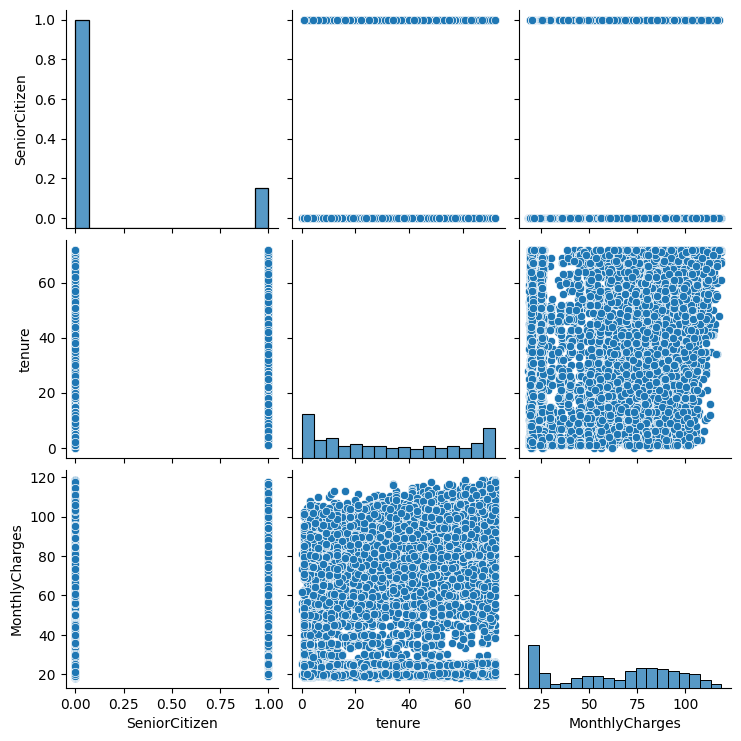

<ipython-input-11-590b9a9ab1c2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


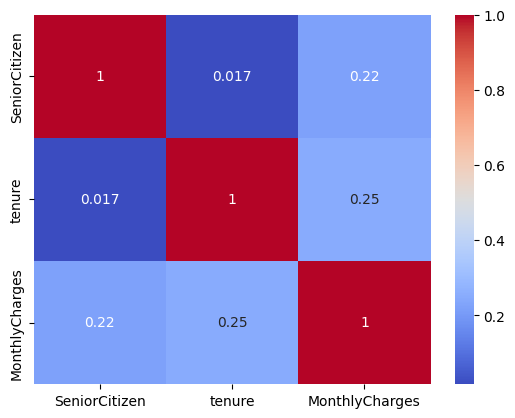

In [ ]:
#identify outliers
#data visualization
# Create a pairplot to visualize relationships between numerical variables
sns.pairplot(df)
plt.show()

#Create a heatmap to visualize correlation between numerical variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#Feature Engineering
#libraries
import pandas as pd
import numpy as np


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical features to scale
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Convert 'TotalCharges' column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Impute missing values in numerical features with median
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_features] = numerical_imputer.fit_transform(df[numerical_features])

# Scale the selected numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
# Create interaction feature
df['tenure_monthlycharges_interaction'] = df['tenure'] * df['MonthlyCharges']


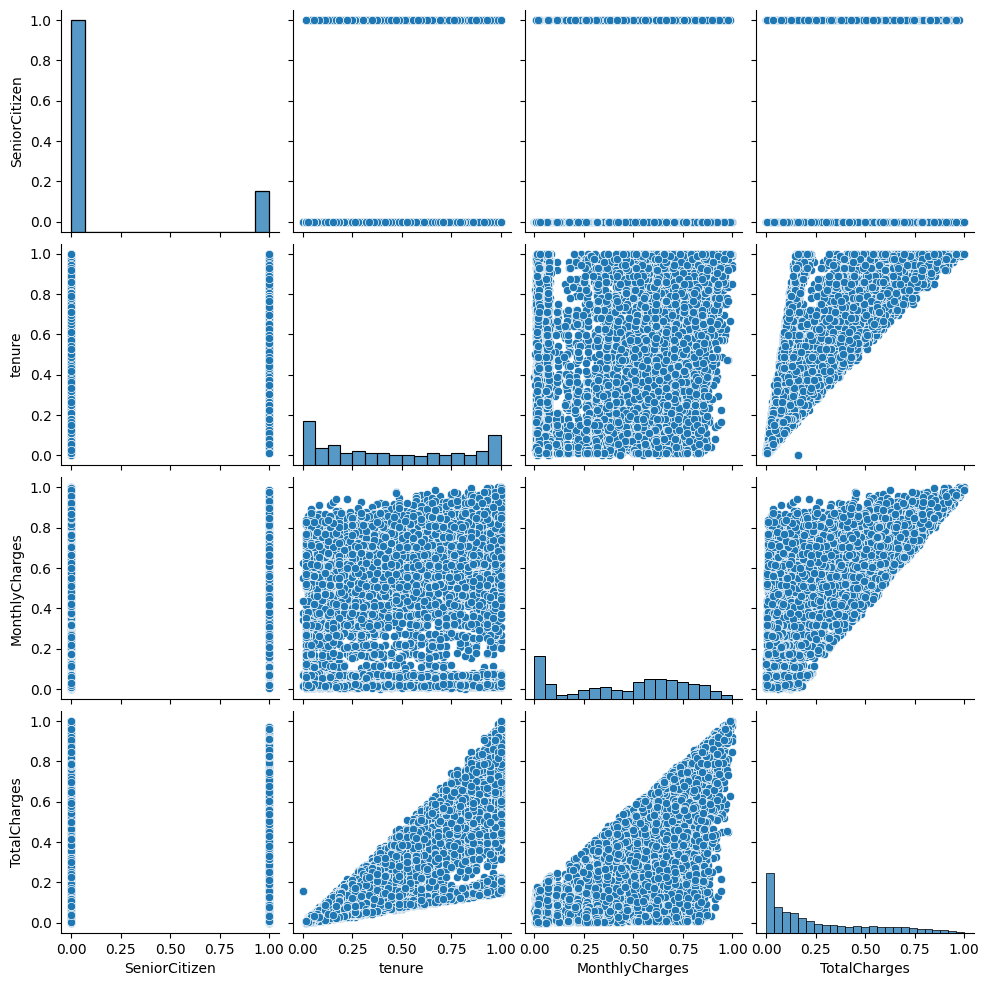

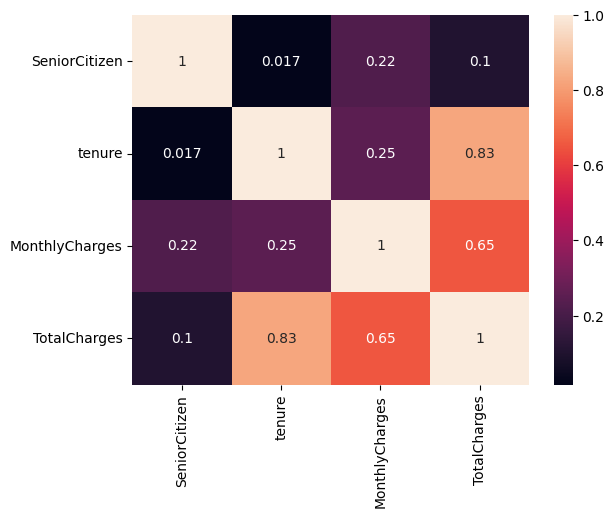

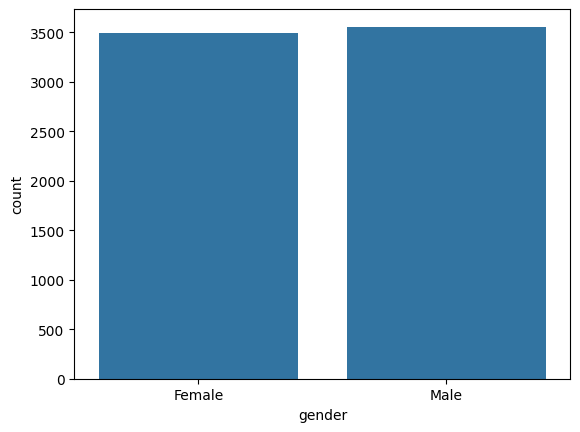

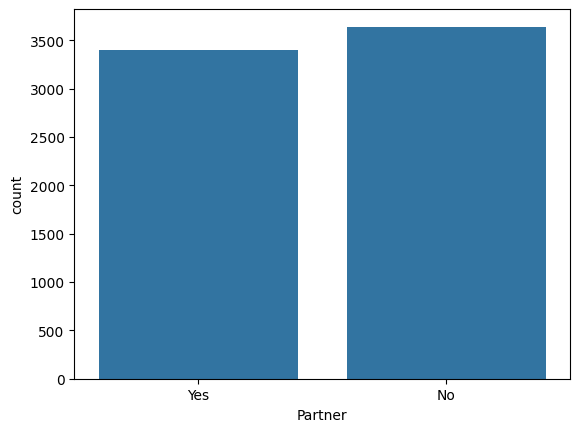

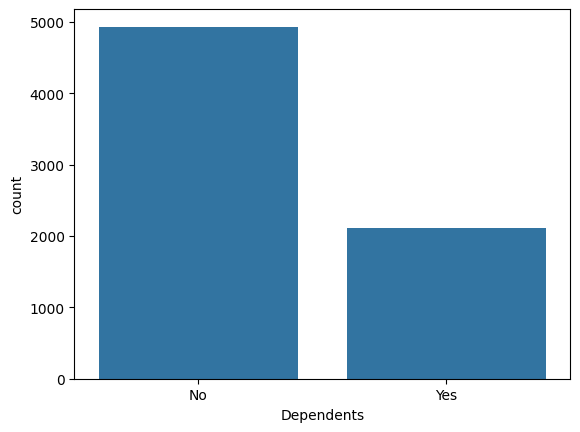

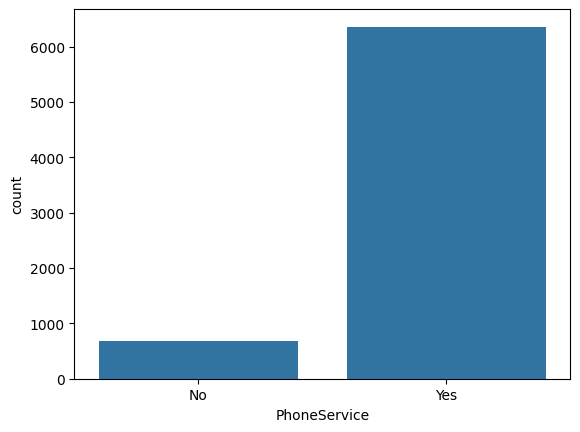

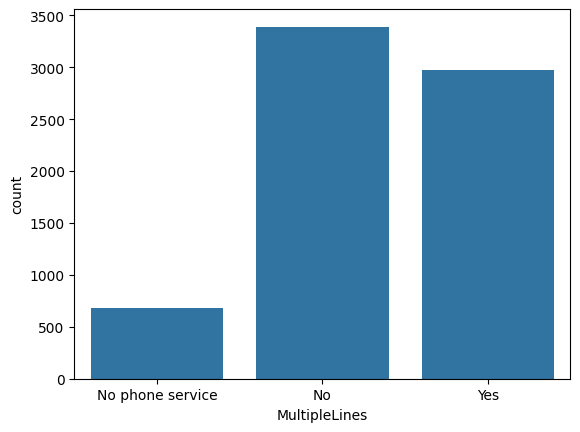

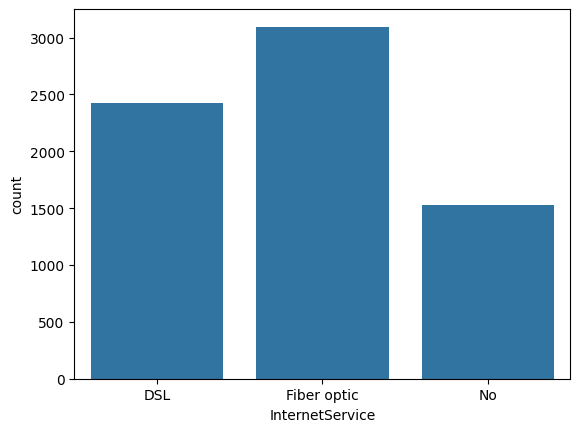

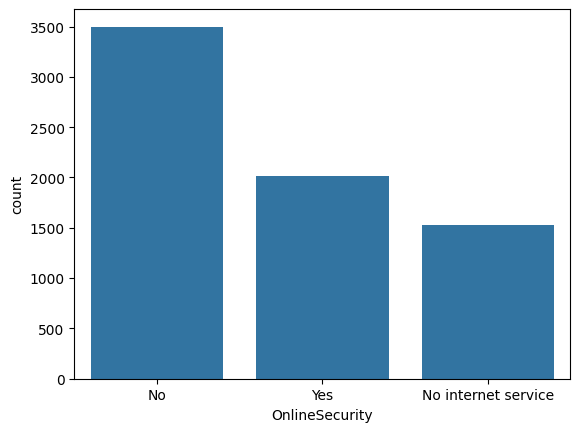

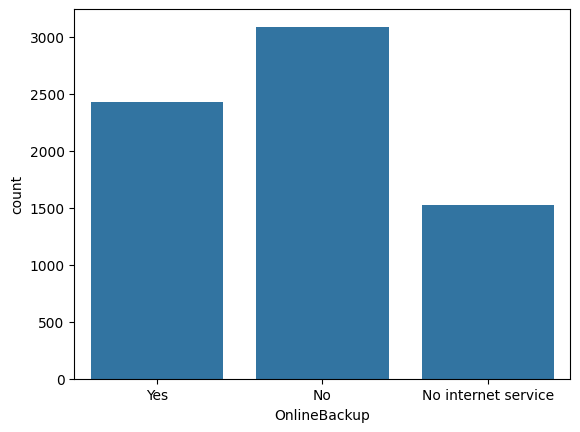

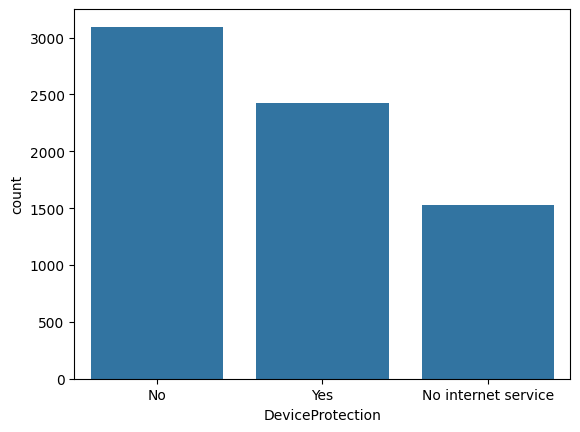

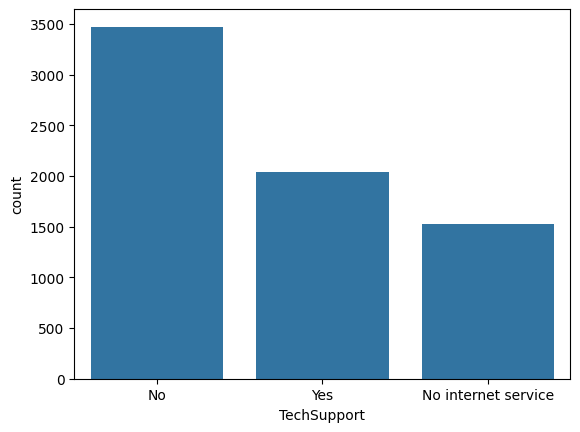

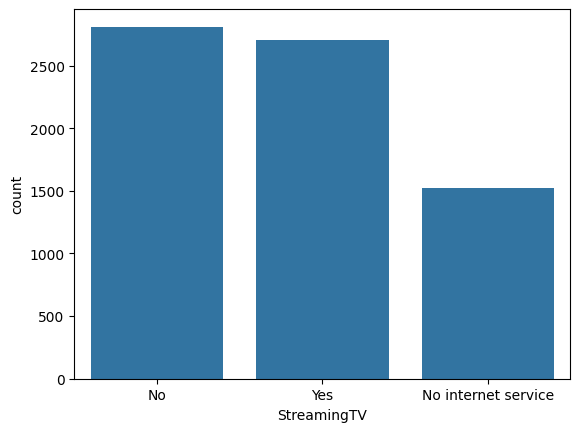

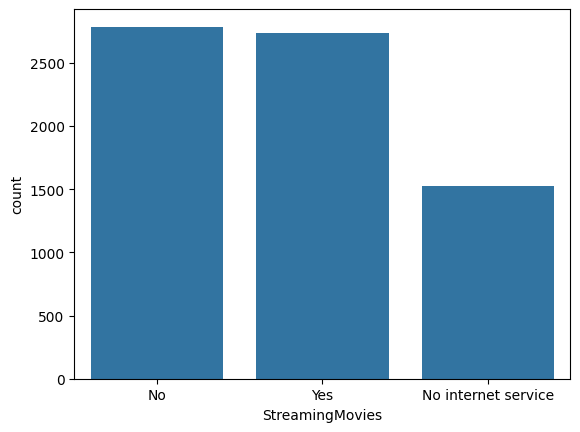

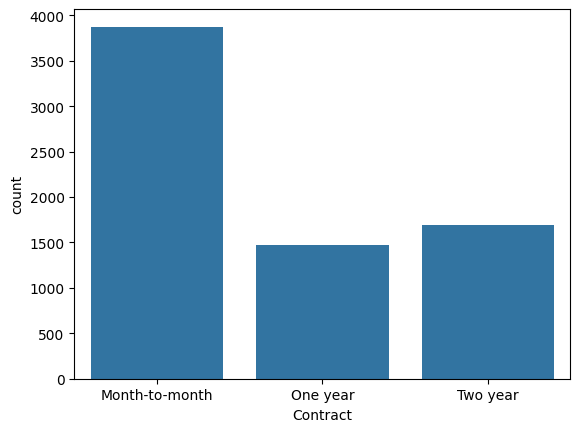

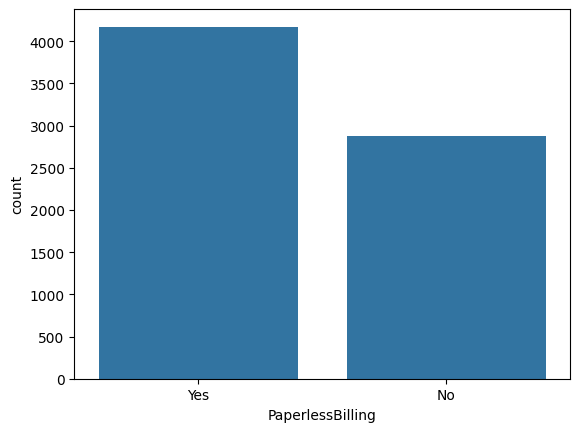

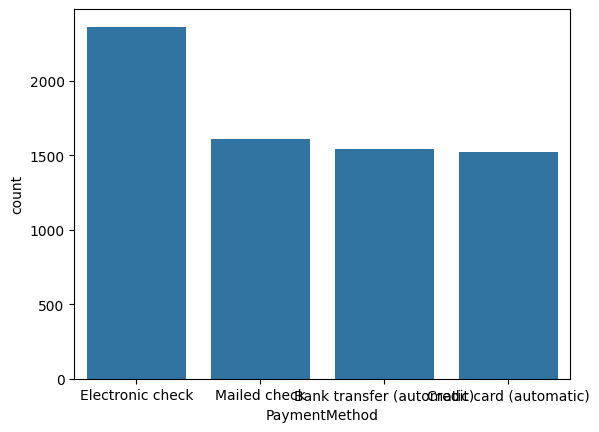

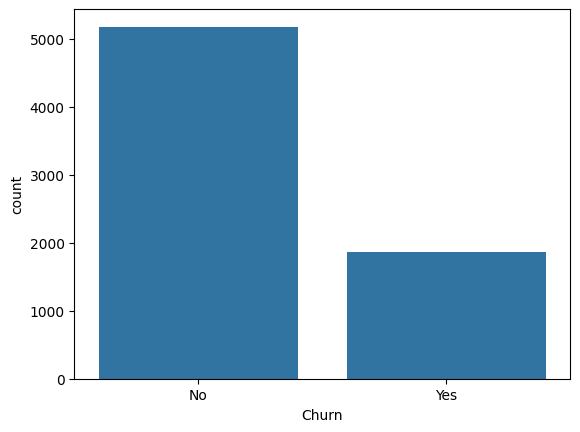

In [ ]:
#exploring data after handling outliers/ data processing
import matplotlib.pyplot as plt
import seaborn as sns

# Explore distributions of numerical features
sns.pairplot(df[numerical_features])
plt.show()

# Explore relationships between features
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.show()

# Explore distributions of categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for column in categorical_features:
    sns.countplot(x=column, data=df)
    plt.show()


Machine learning development


In [ ]:
#machine learning development
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Assuming df is the DataFrame containing your data

# Drop rows with missing values in 'TotalCharges' column
df = df.dropna(subset=['TotalCharges'])

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Encode categorical variables
le = LabelEncoder()
for column in df.columns[df.dtypes == 'object']:
    df[column] = le.fit_transform(df[column])

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
#machine learning evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7913413768630234
Decision Tree Accuracy: 0.7210787792760823
Random Forest Accuracy: 0.794180269694819
Gradient Boosting Accuracy: 0.8062455642299503


In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize dictionaries to store evaluation metrics for each classifier
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
roc_auc_scores = {}
confusion_matrices = {}

# Evaluate each classifier
for clf_name, clf in classifiers.items():
    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy_scores[clf_name] = accuracy_score(y_test, y_pred)
    precision_scores[clf_name] = precision_score(y_test, y_pred)
    recall_scores[clf_name] = recall_score(y_test, y_pred)
    f1_scores[clf_name] = f1_score(y_test, y_pred)
    roc_auc_scores[clf_name] = roc_auc_score(y_test, y_pred)
    confusion_matrices[clf_name] = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for each classifier
for clf_name in classifiers.keys():
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy_scores[clf_name]}")
    print(f"Precision: {precision_scores[clf_name]}")
    print(f"Recall: {recall_scores[clf_name]}")
    print(f"F1-score: {f1_scores[clf_name]}")
    print(f"ROC AUC: {roc_auc_scores[clf_name]}")
    print(f"Confusion Matrix:\n{confusion_matrices[clf_name]}\n")


Classifier: Logistic Regression
Accuracy: 0.7913413768630234
Precision: 0.6286644951140065
Recall: 0.517426273458445
F1-score: 0.5676470588235294
ROC AUC: 0.7036938317099176
Confusion Matrix:
[[922 114]
 [180 193]]

Classifier: Decision Tree
Accuracy: 0.7210787792760823
Precision: 0.475
Recall: 0.5093833780160858
F1-score: 0.49159120310478654
ROC AUC: 0.6533403376566915
Confusion Matrix:
[[826 210]
 [183 190]]

Classifier: Random Forest
Accuracy: 0.794180269694819
Precision: 0.6531365313653137
Recall: 0.4745308310991957
F1-score: 0.5496894409937888
ROC AUC: 0.6918986201828025
Confusion Matrix:
[[942  94]
 [196 177]]

Classifier: Gradient Boosting
Accuracy: 0.8062455642299503
Precision: 0.6724137931034483
Recall: 0.5227882037533512
F1-score: 0.5882352941176471
ROC AUC: 0.7155446810272548
Confusion Matrix:
[[941  95]
 [178 195]]



In [ ]:
# Predict customer churn using the trained model
y_pred = rf_classifier.predict(X_test)

# Calculate feature importance scores
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features and their importance scores
print("Top Features Importance Scores:")
print(feature_importance_df.head())

# Use the model's predictions for further analysis or decision-making
# For example, you can analyze the predictions and take appropriate actions to retain customers.


Top Features Importance Scores:
                              Feature  Importance
19                       TotalCharges    0.129182
18                     MonthlyCharges    0.128769
20  tenure_monthlycharges_interaction    0.116620
5                              tenure    0.116561
0                          customerID    0.112304


In [ ]:
# Predict churn using the trained model
y_pred = rf_classifier.predict(X_test)

# Display the predicted churn values
print("Predicted Churn:")
print(y_pred)


Predicted Churn:
[1 0 0 ... 0 0 0]
